# Exploratory Data Analysis EDA - Bank Transactions DB 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load the dataset
data = pd.read_csv('Data/bank_transactions_data_2.csv')

1. Overview of the Data

In [3]:
# Check the first few 5 rows
print(data.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [4]:
# Display dataset shape and column information
print("\nDataset Shape:", data.shape)
print(data.info())


Dataset Shape: (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 1

In [5]:
# Summary statistics
print(data.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


<h4>2. Data Cleaning</h4>
This dataset is already clean but I will include the basic steps to check missing values as well as duplicates

In [6]:
# Check for missing values
print(data.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)
if duplicates > 0:
    data.drop_duplicates(inplace=True)


Number of Duplicate Rows: 0


3. Exploratory Data Analysis

In [14]:
# Set plot style for consistency
sns.set(style="whitegrid")

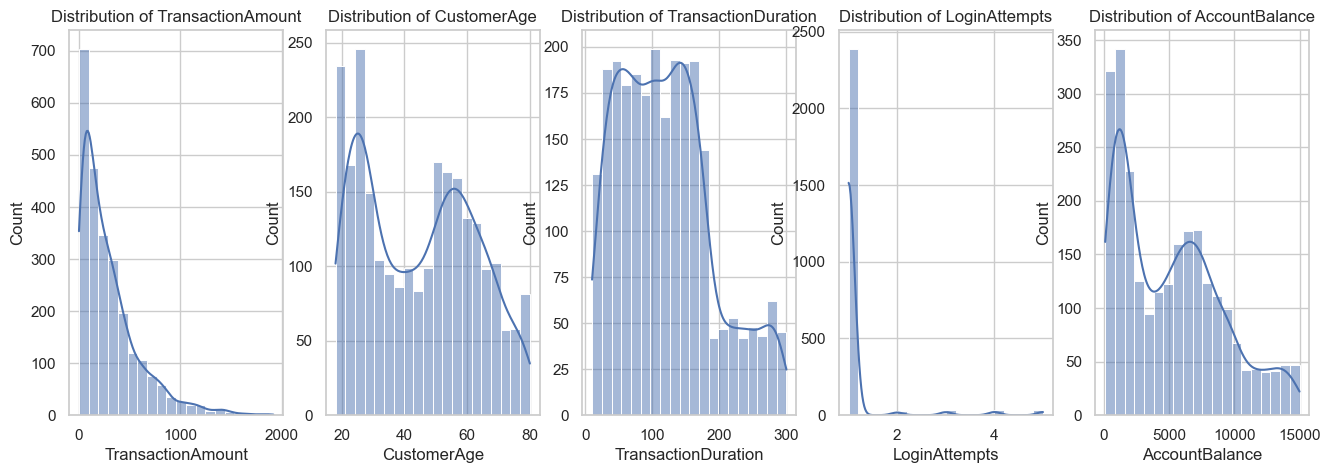

In [74]:
# Select only numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for the subplot grid based on the number of numerical columns
num_plots = len(num_cols)
n_rows = (num_plots // 5) + (num_plots % 5 > 0)  # Calculate number of rows needed

fig, ax = plt.subplots(n_rows, 5, figsize=(16, n_rows * 5))

# Flatten the axes array for easy indexing
ax = ax.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=data, x=col, bins=20, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust the vertical spacing between subplots    
plt.subplots_adjust(hspace=0.5)  

plt.show()


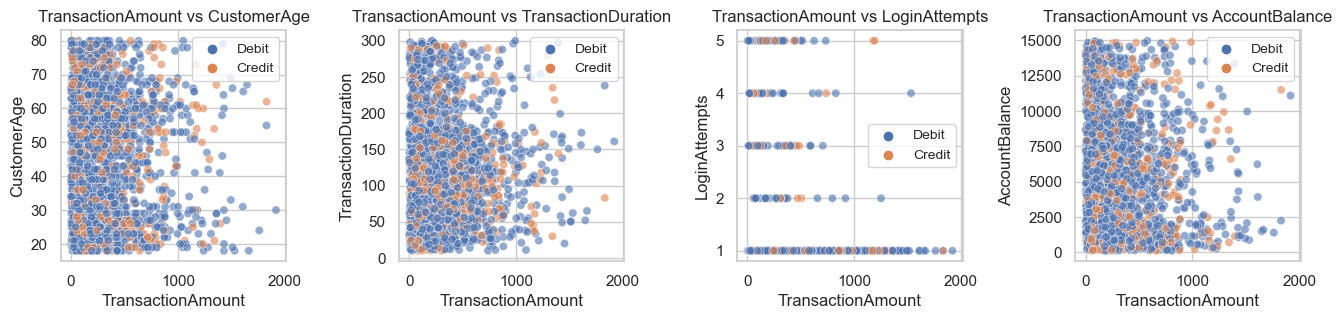

In [ ]:
# Select only numerical columns
num_cols = ['CustomerAge', 'TransactionDuration','LoginAttempts', 'AccountBalance']

fig, ax = plt.subplots(1, 4, figsize=(16, 3))

# Flatten the axes array for easy indexing
ax = ax.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.scatterplot(data=data, x='TransactionAmount', y=col, ax=ax[i], alpha=0.6,hue='TransactionType')
    ax[i].set_title(f'TransactionAmount vs {col}')
    ax[i].legend(fontsize='small') 

# Adjust the vertical spacing between subplots    
plt.subplots_adjust(wspace=0.5)  
plt.show()


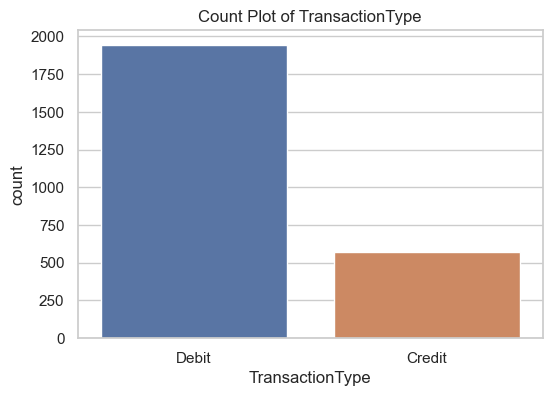

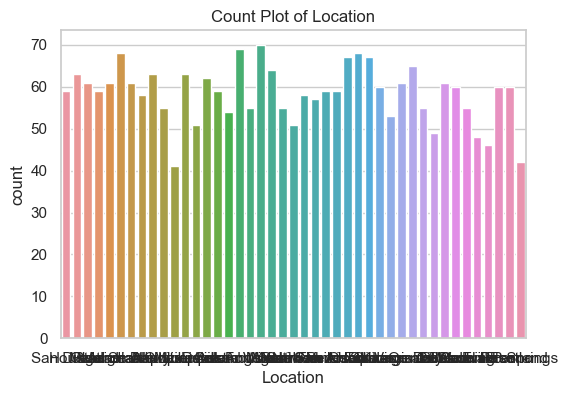

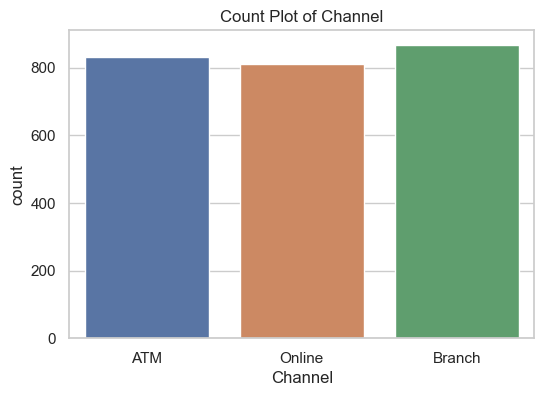

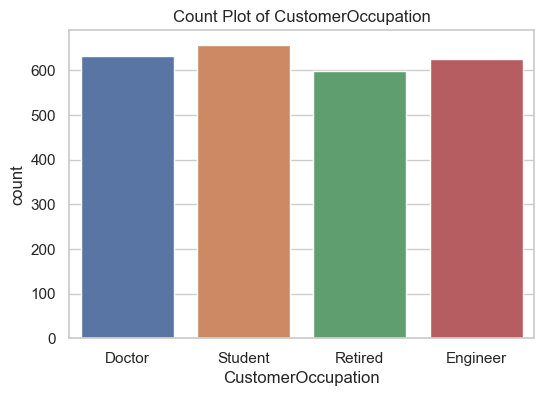

In [12]:
# Univariate Analysis: Plotting value counts for categorical columns
cat_cols = ['TransactionType','Location','Channel','CustomerOccupation']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.show()

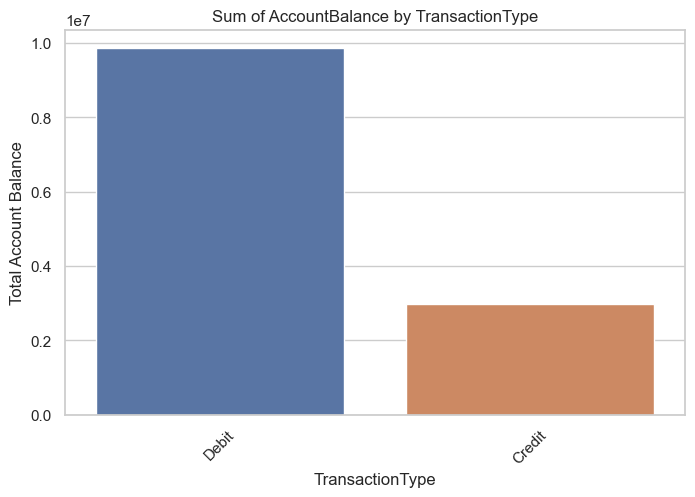

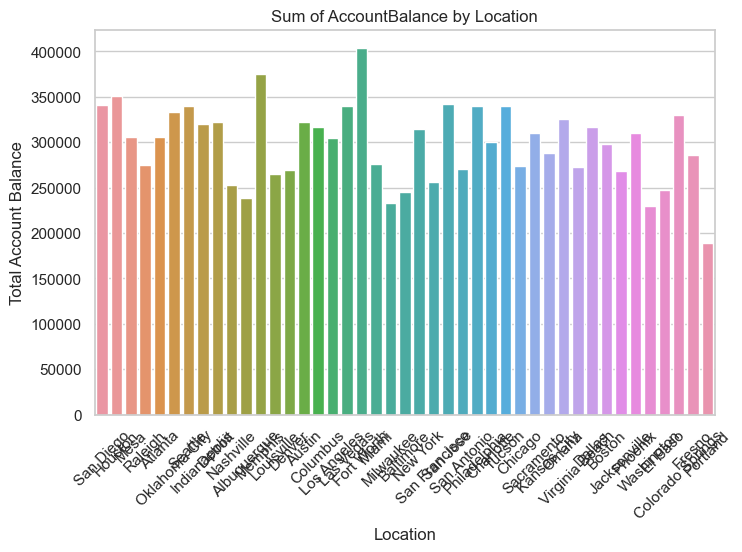

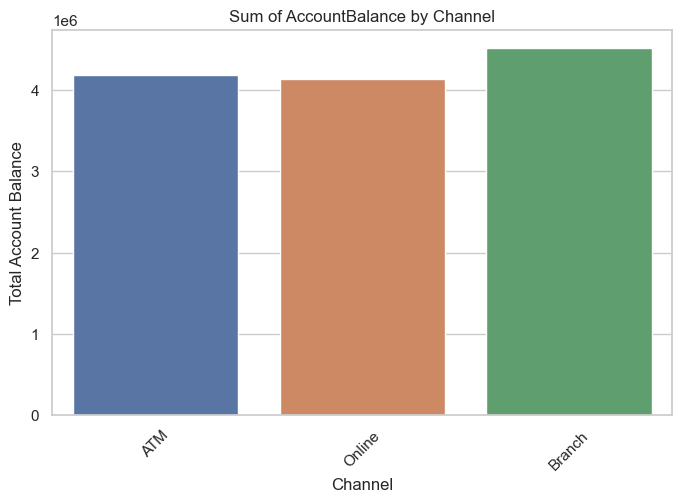

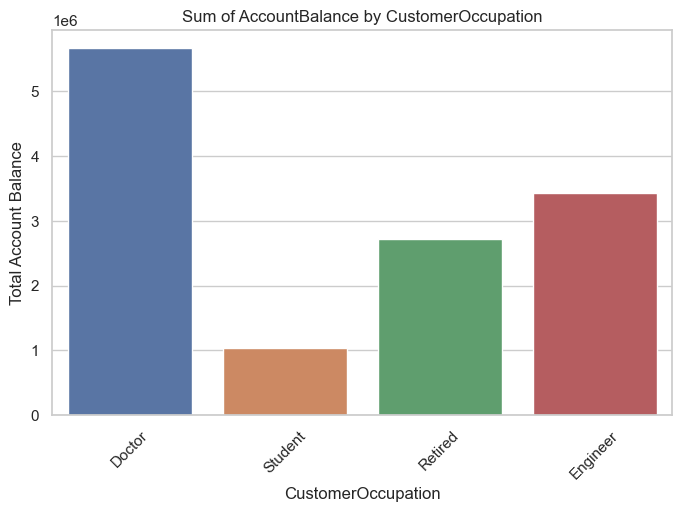

In [54]:
# Univariate Analysis: Plotting the sum of TransactionAmount for categorical columns
cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=data, x=col, y='AccountBalance', estimator=sum, ci=None)
    plt.title(f'Sum of AccountBalance by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Account Balance')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [ ]:
# Univariate Analysis: Plotting value counts for categorical columns
cat_cols = ['TransactionType','Location','Channel','CustomerOccupation']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.show()

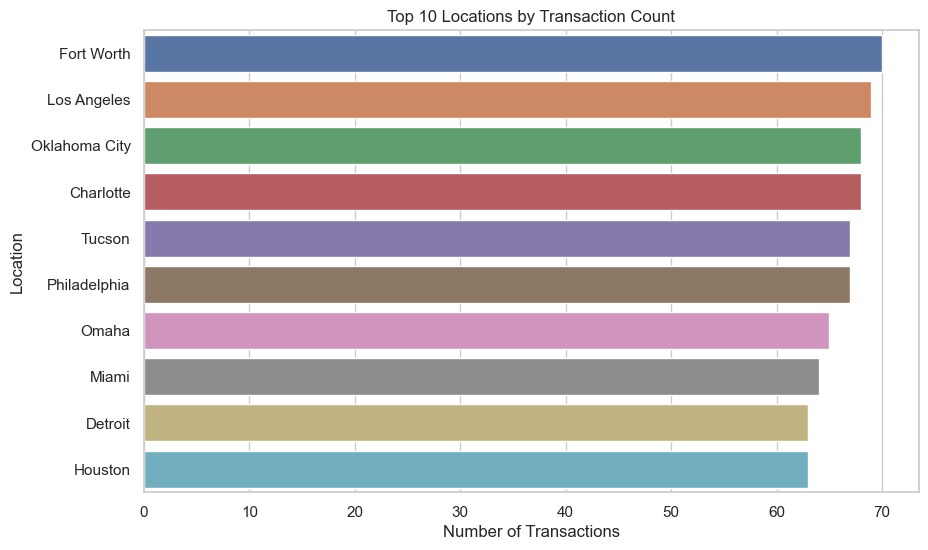

In [39]:
#Let's select only the top locations since the dataset have too many values
top_locations = data['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values)
plt.title('Top 10 Locations by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.show()

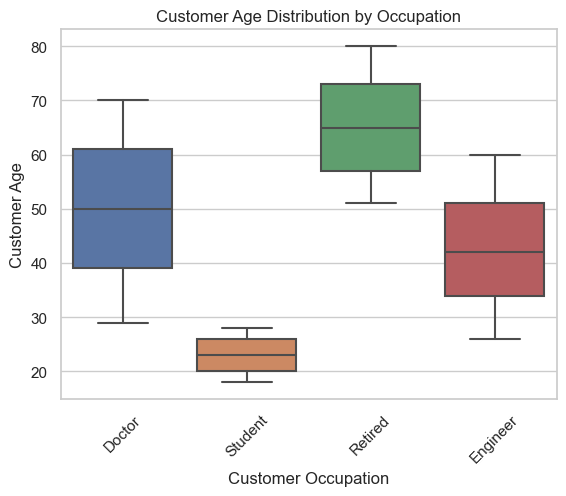

In [52]:
# Create a box plot to show the age distribution across occupations
sns.boxplot(data=data, x='CustomerOccupation', y='CustomerAge')
plt.title('Customer Age Distribution by Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

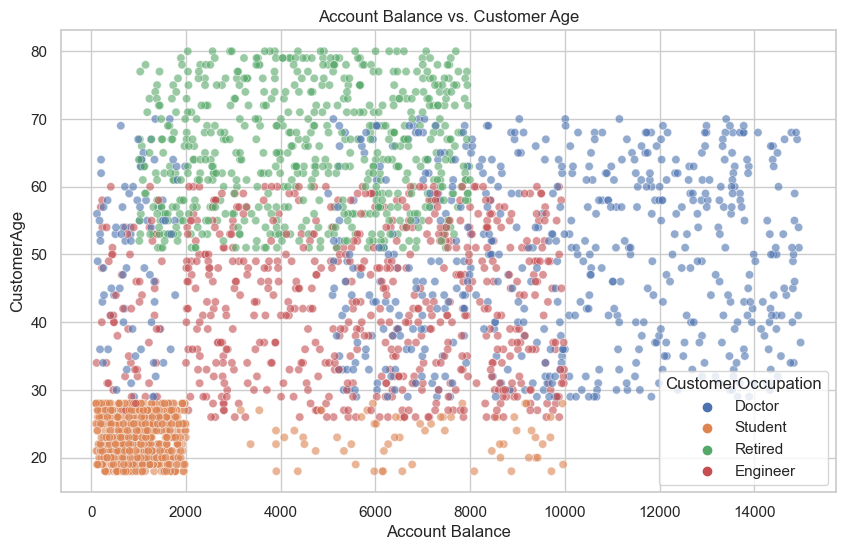

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AccountBalance', y='CustomerAge', hue='CustomerOccupation', alpha=0.6)
plt.title('Account Balance vs. Customer Age')
plt.xlabel('Account Balance')
plt.ylabel('CustomerAge')

plt.show()

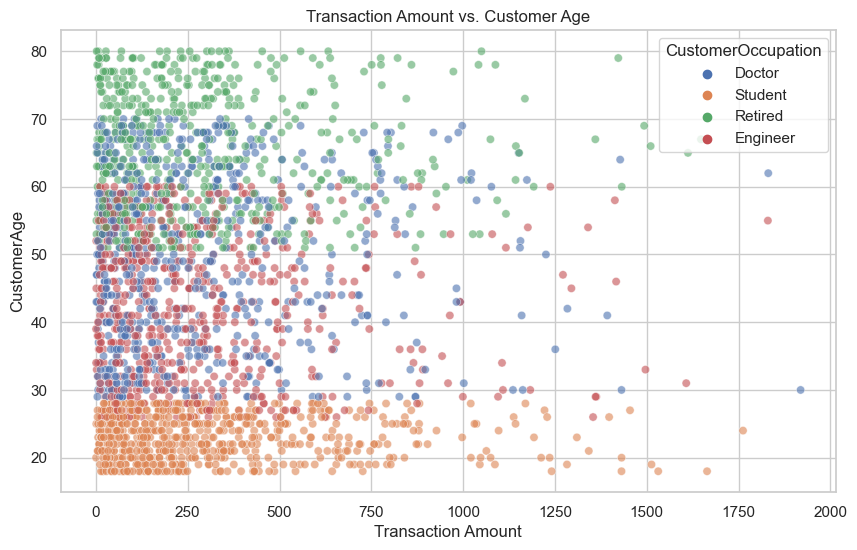

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TransactionAmount', y='CustomerAge', hue='CustomerOccupation', alpha=0.6)
plt.title('Transaction Amount vs. Customer Age')
plt.xlabel('Transaction Amount')
plt.ylabel('CustomerAge')

plt.show()

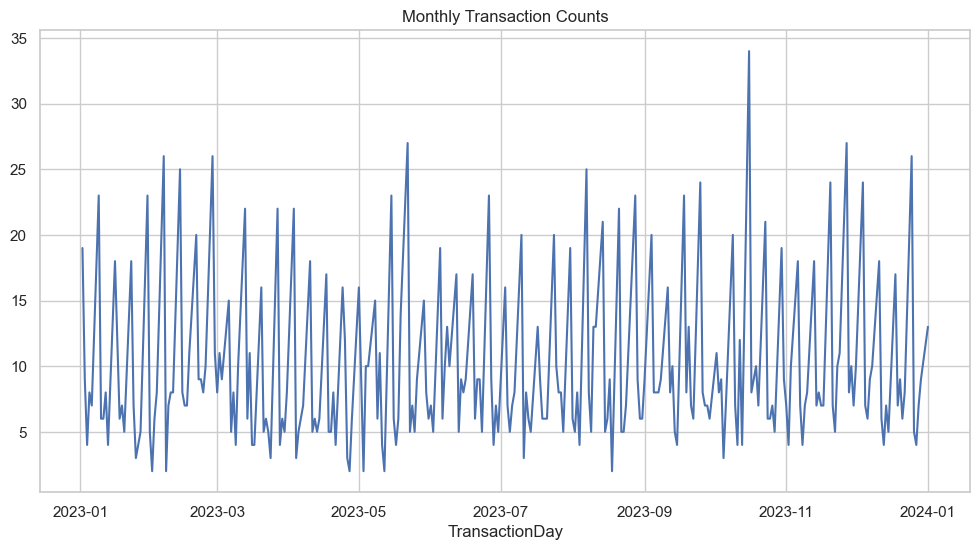

In [36]:
# Transactions over time
data['TransactionDay'] = pd.to_datetime(data['TransactionDate']).dt.date
data_dy = data.groupby('TransactionDay').size()
plt.figure(figsize=(12, 6))
data_dy.plot(title="Monthly Transaction Counts")
plt.show()

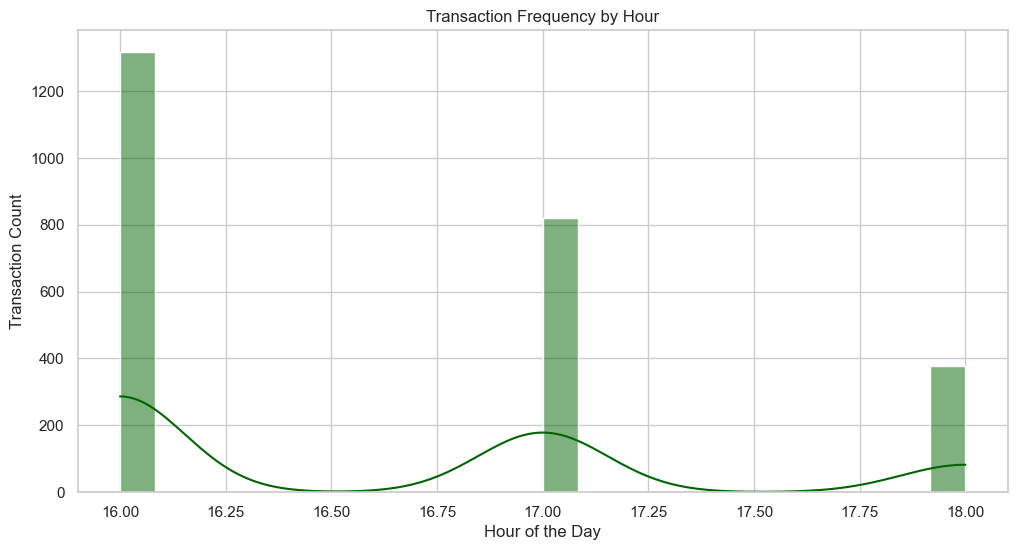

In [37]:
data['Hour'] = pd.to_datetime(data['TransactionDate']).dt.hour 
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Hour', kde=True, bins=24, color='darkgreen')
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.show()

<h4>4. Bivariate Analysis</h4>

C:\Users\carol\AppData\Local\Temp\ipykernel_3768\2340298157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


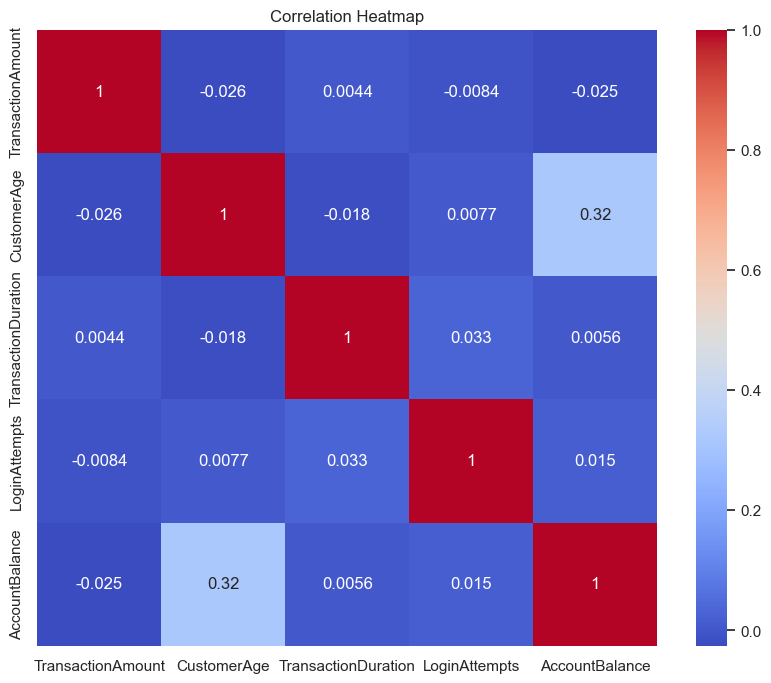

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<h4>Summary and Conclusion Points</h4>
After completing these analyses, we can conclude the following:

<ul>
    <li>Demographics: The "Students" group has the lowest average account balance and transaction volume, followed by the "Retired" group. On the other hand, "Doctors" have the highest average account balances, followed by "Engineers".</li>
    <li>Fraud Detection Insights: To investigate potential fraud, feature engineering will be necessary. This could involve creating new features, such as the day of the week, transaction frequency by branch, customer transaction frequency, and the relationship with login attempts.</li>
    <li>Channel Preferences: There is no clear winner among transaction channels. However, for credit transactions, branches are more popular than online or ATM channels.</li>
    <li>Data Issues: While the dataset is generally clean, we identified an issue where the "Previous Transaction Date" is listed after the "Transaction Date." This should not be possible, as the previous transaction date should always be earlier than the transaction date.</li>
</ul>

Next Steps: Implement feature engineering and apply a classification algorithm to identify trends and possible fraud cases.